In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
68,11-05-2020,3181,70817
69,12-05-2020,3702,74519
70,13-05-2020,3485,78004
71,14-05-2020,4261,82265


In [5]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
68,68,70817
69,69,74519
70,70,78004
71,71,82265


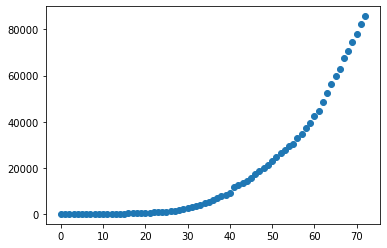

In [6]:

plt.scatter(data['days'], data['confirmed'])


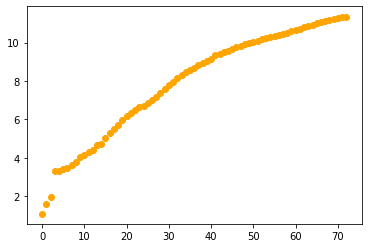

In [7]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [8]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

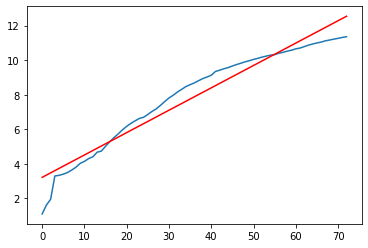

In [9]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

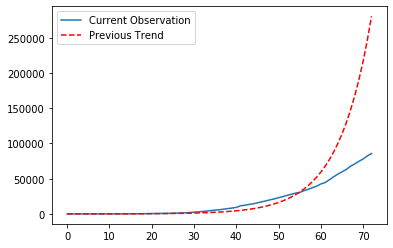

In [10]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [11]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9435716457685255

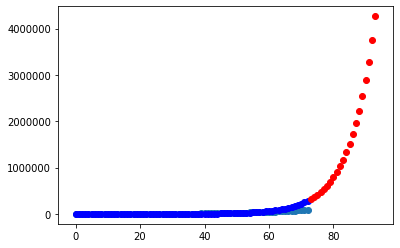

In [12]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [13]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93]),
 array([[ 319362.20455028],
        [ 363536.91099016],
        [ 413821.93562439],
        [ 471062.46773536],
        [ 536220.60457988],
        [ 610391.52229284],
        [ 694821.88357698],
        [ 790930.79157452],
        [ 900333.64211304],
        [1024869.27523311],
        [1166630.88236013],
        [1328001.18860701],
        [1511692.50155099],
        [1720792.29962327],
        [1958815.12635978],
        [2229761.6627503 ],
        [2538185.97057218],
        [2889272.03693291],
        [3288920.90657981],
        [3743849.86649458],
        [4261705.34986422]]))

In [14]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
68,11-05-2020,3181,70817
69,12-05-2020,3702,74519
70,13-05-2020,3485,78004
71,14-05-2020,4261,82265


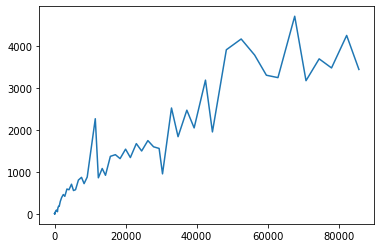

In [15]:
plt.plot(dt['confirmed'],dt['Infected'])

In [16]:
m

array([0.12955494])

In [17]:
1.0+m*14+m**2*24

array([3.21659672])